In [58]:
import numpy as np
from collections import defaultdict
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/i258312/.local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['resize', 'sample', 'size']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [59]:
img_dir = '/pio/scratch/2/i258312/imdb_crop'
mat_file = '/pio/scratch/2/i258312/imdb_crop/imdb.mat'

In [60]:
import scipy.io
mat_data = scipy.io.loadmat(mat_file)

In [61]:
data_table = mat_data['imdb'][0][0]

In [80]:
ids = data_table[0][0,:]
years = data_table[1][0,:]
filenames = data_table[2][0,:]
sex = data_table[3][0,:] # ???
names = data_table[4][0,:]

In [81]:
ids.shape, ids[0], ids[6]

((460723,), 693726, 702986)

In [82]:
years.shape, years[3], years[56]

((460723,), 1968, 1963)

In [83]:
filenames.shape, filenames[34]

((460723,), array([u'02/nm0000002_rm4111175424_1924-9-16_2010.jpg'], 
       dtype='<U44'))

In [84]:
uniq_sexes = defaultdict(int)
for s in sex:
    uniq_sexes[s] += 1

len(uniq_sexes.keys()) # a lot of NaNs there...

8464

In [85]:
names.shape, names[342]

((460723,), array([u'John Gielgud'], 
       dtype='<U12'))

In [86]:
from scipy import misc
from skimage.transform import resize
from skimage.util import crop
import glob
from collections import defaultdict

In [87]:
def read(filename):
    im = misc.imread(img_dir+'/'+filename[0])
    return im

In [88]:
images = []
for f in filenames:
    images.append(read(f))

KeyboardInterrupt: 

In [ ]:
for (i,s) in enumerate(sex[:10000]):
    if s not in [0.0,1.0]:
        im = read(filenames[i])
        imshow(im)
        show()
        print(s)

In [71]:
size = 30
margin = int(0.25*size)
before_crop = size+2*margin

In [74]:
n = 0
images = []
filenames = []
sizes = defaultdict(int)
for filename in glob.glob(img_dir+'/01/*'):
    filenames.append(filename)
    im = misc.imread(filename)
    im = resize(im, (before_crop, before_crop, 3), mode='edge')
    im = crop(im, ((margin, margin), (margin, margin), (0,0)))
    images.append(im)
    sizes[im.shape] += 1
    n += 1

In [75]:
sizes.keys()

[(30, 30, 3)]

In [76]:
#plt.scatter(sizes.keys(),sizes.values())

In [77]:
#images_arr = np.array(images)
#img_sample = np.random.choice(images, 10)

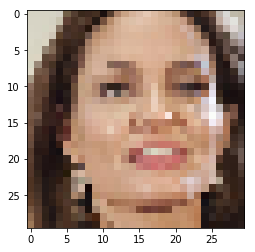

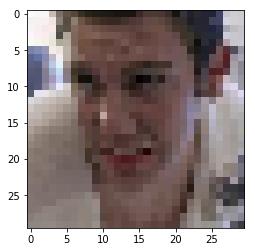

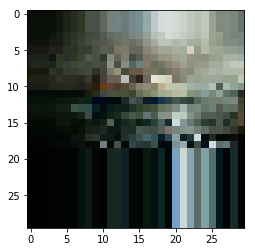

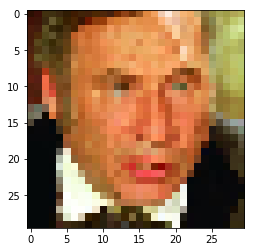

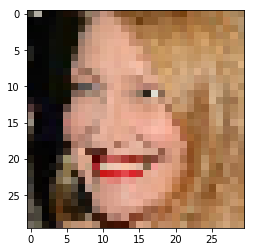

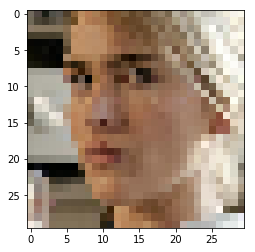

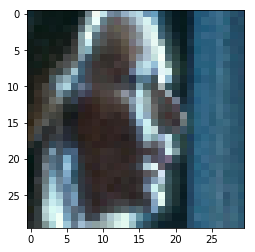

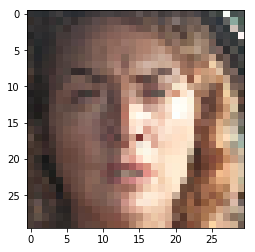

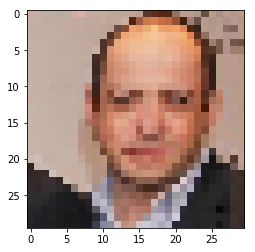

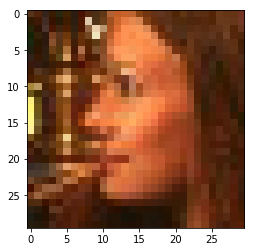

In [78]:
import matplotlib.pyplot as plt

sample = np.random.randint(0, n, 10)

for i in sample:
    imshow(images[i])
    show()

#for im in img_sample:
#   plt.imshow(im)
#  plt.show()

In [79]:
filenames = np.array(filenames)

filenames[sample]

array([ '/pio/scratch/2/i258312/imdb_crop/01/nm0001401_rm2394279424_1975-6-4_2014.jpg',
       '/pio/scratch/2/i258312/imdb_crop/01/nm0365501_rm3957561600_1982-4-6_2006.jpg',
       '/pio/scratch/2/i258312/imdb_crop/01/nm0001401_rm246842368_1975-6-4_2010.jpg',
       '/pio/scratch/2/i258312/imdb_crop/01/nm0385301_rm2029957120_1940-0-0_1974.jpg',
       '/pio/scratch/2/i258312/imdb_crop/01/nm0165101_rm2033362688_1959-12-29_2013.jpg',
       '/pio/scratch/2/i258312/imdb_crop/01/nm0000701_rm2871177984_1975-10-5_2011.jpg',
       '/pio/scratch/2/i258312/imdb_crop/01/nm0000201_rm3186065664_1958-4-29_2000.jpg',
       '/pio/scratch/2/i258312/imdb_crop/01/nm0000701_rm3705394688_1975-10-5_2013.jpg',
       '/pio/scratch/2/i258312/imdb_crop/01/nm0271501_rm3043807232_1949-8-17_2010.jpg',
       '/pio/scratch/2/i258312/imdb_crop/01/nm0000601_rm3418003712_1944-11-21_2002.jpg'], 
      dtype='|S78')